# Logistic Regression

## Importing Libraries

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Ignore Warnings while running script

In [171]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [172]:
dataset = pd.read_csv('C:\\Users\\Dell\\Desktop\\python books\\ML_Udemy\\Machine Learning A-Z (Codes and Datasets)\\Breast Cancer Prediction Project\\breast_cancer.csv')

In [173]:
dataset.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [174]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [175]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [176]:
dataset.shape

(683, 11)

## Dependent & Independent Vairable

In [177]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [178]:
print(X)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


In [179]:
print(y)

[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2
 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4
 2 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2
 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 2 2 2 4 4 4 2 4 2 4 2 2
 2 2 2 2 2 2 2 2 2 2 4 2 

## Splitting the dataset into the Training set and Test set

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [181]:
print(X_train)

[[ 8  6  4 ...  3  1  1]
 [ 4  1  1 ...  2  1  1]
 [ 8 10  8 ...  7  7  1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 [10  9  7 ...  7  7  1]]


In [182]:
len(X_test)

205

In [183]:
len(X_train)

478

In [184]:
print(X_test)

[[ 1  1  1 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 [ 5  5  5 ...  4  3  1]
 ...
 [ 3  1  2 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 [10  8  4 ...  3 10  4]]


In [185]:
print(y_train)

[4 2 4 2 2 2 4 2 2 2 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2 2 4 2 4 2 4 2 2 2
 2 2 4 2 2 4 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2 4 4 4 2 2 2 2 2 2 4 4 2 2 2 2
 2 2 2 4 2 2 4 2 2 2 2 2 2 2 4 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 4 2 4 2 2 4 2
 2 2 2 2 2 2 4 4 4 4 2 4 2 4 2 4 4 4 2 2 4 2 2 2 2 4 4 2 2 2 4 2 2 4 2 2 2
 2 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 4 4 4 2 2 4 2 4 2 4 2 2 2
 2 4 2 4 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 2 4
 2 2 4 2 2 2 2 4 4 2 2 2 2 4 2 2 4 2 2 2 2 4 4 2 4 2 4 2 2 2 4 4 4 2 2 2 2
 2 2 2 2 4 4 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 2 2 4 2 4 4 2 2
 2 2 2 2 2 4 2 2 2 4 2 2 4 4 4 2 4 4 4 2 2 2 4 2 4 2 2 4 2 4 4 4 2 2 2 4 2
 4 4 4 2 2 2 4 2 4 2 2 2 2 4 4 2 2 2 4 4 2 2 4 2 2 2 4 4 2 2 2 4 2 2 2 4 2
 4 2 2 4 2 2 2 2 4 4 2 2 4 4 2 2 4 4 4 2 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2
 2 2 2 4 2 4 2 4 2 2 4 2 2 2 2 4 2 2 2 4 2 2 4 4 4 4 2 4 4 2 4 4 2 2 2 2 2
 2 4 2 2 2 2 4 4 2 4 4 4 2 2 4 4 2 2 2 2 2 2 4 2 2 4 2 2 4 2 2 2 2 4]


In [186]:
print(y_test)

[2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2
 2 2 4 2 2 2 4 2 4 2 2 4 2 2 4 2 4 2 4 4 4 2 4 4 4 2 2 2 4 4 2 2 4 4 2 2 4
 2 2 4 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 4 2 2 4 2 2 4 2 4 2 2 2 4 2 2 2 2 4 2
 4 2 4 4 2 2 2 2 4 4 2 4 4 4 4 4 4 2 2 2 2 2 2 4 4 4 2 2 2 4 2 2 4 4 2 4 2
 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4]


## Training the Logistic Regression model on the Training set

In [187]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predicting New Result

In [188]:
print(classifier.predict([[ 8  ,3 , 4 , 9,  3 ,10 , 3 , 3  ,1]]))

[4]


In [189]:
y_pred = classifier.predict(X_test)

In [190]:
y_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 4], dtype=int64)

## Compare y_pred and y_test

In [191]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]

## Check with Confusion Matrix

In [192]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)


[[126   4]
 [  9  66]]


0.9365853658536586

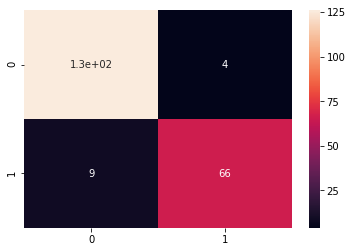

In [193]:
# from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
sns.heatmap(cm,annot = True)  
plt.show()

## Cross Validation 

## K Fold Cross Vaildation

In [194]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Kfold_validation = KFold(10)

In [205]:
results = cross_val_score(classifier,X,y,cv = Kfold_validation)
print(results)
print()
print(np.mean(results))


[0.86956522 0.97101449 0.98550725 0.92647059 0.92647059 1.
 0.95588235 0.98529412 1.         1.        ]

0.9620204603580564


    - Hypertuning can be explored because range is from 0.86 to 1

0.9620204603580564


## Stratified K-fold Cross Validation

In [204]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)

scores=cross_val_score(classifier,X,y,cv=skfold)
print(scores)
print()
print(np.mean(scores))

[0.91240876 0.94890511 0.97810219 0.98540146 0.99259259]

0.9634820221681537


## Leave One Out Cross Validation(LOOCV)

In [198]:
from sklearn.model_selection import LeaveOneOut

leave_validation=LeaveOneOut()
results=cross_val_score(classifier,X,y,cv=leave_validation)


In [199]:
print(results)

[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

## Repeated Random Test-Train Splits
This technique is a hybrid of traditional train-test splitting and the k-fold cross-validation method. In this technique, we create random splits of the data in the training-test set manner and then repeat the process of splitting and evaluating the algorithm multiple times, just like the cross-validation method.

In [200]:
from sklearn.model_selection import ShuffleSplit

ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(classifier,X,y,cv=ssplit)
print(results)

[0.96097561 0.95609756 0.97560976 0.96097561 0.94634146 0.97073171
 0.98536585 0.97560976 0.96585366 0.96585366]
